In [27]:
# ✅ Step 1: import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv("IMDb_Top_1000_Enhanced.csv")


In [29]:
# ✅ Step 2: Load Dataset
df = pd.read_csv("IMDb_Top_1000_Enhanced.csv")
df.head()

,id,title,genres,averageRating,numVotes,releaseYear,Rating_Category,Decade,Votes_Category
0,tt0111161,The Shawshank Redemption,Drama,9.3,3057719,1994,Excellent,1990s,Very High
1,tt0068646,The Godfather,"Crime, Drama",9.2,2134529,1972,Excellent,1970s,Very High
2,tt0252487,The Chaos Class,Comedy,9.2,44607,1975,Excellent,1970s,Low
3,tt33175825,Attack on Titan the Movie: The Last Attack,"Action, Adventure, Animation",9.2,17344,2024,Excellent,2020s,Low
4,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.1,16480,1993,Excellent,1990s,Low


In [11]:
# ✅ Step 3: Explore Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [13]:
df.isnull().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

In [19]:
print(df.columns)

Index(['id', 'title', 'genres', 'averageRating', 'numVotes', 'releaseYear'], dtype='object')


In [27]:
print(df.columns.tolist())


['id', 'title', 'genres', 'averageRating', 'numVotes', 'releaseYear']


In [29]:
# ✅ Step 5: Clean the Data using correct column names

# Drop missing values
df.dropna(inplace=True)

# Rename columns for easier reference (optional)
df.rename(columns={
    'title': 'Title',
    'genres': 'Genre',
    'averageRating': 'IMDB_Rating',
    'numVotes': 'No_of_Votes',
    'releaseYear': 'Year'
}, inplace=True)

# Ensure 'Year' is numeric
df['Year'] = df['Year'].astype(int)

# Runtime not in dataset, skip cleaning it or add your own if available
# df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)  # skip or customize if runtime is present


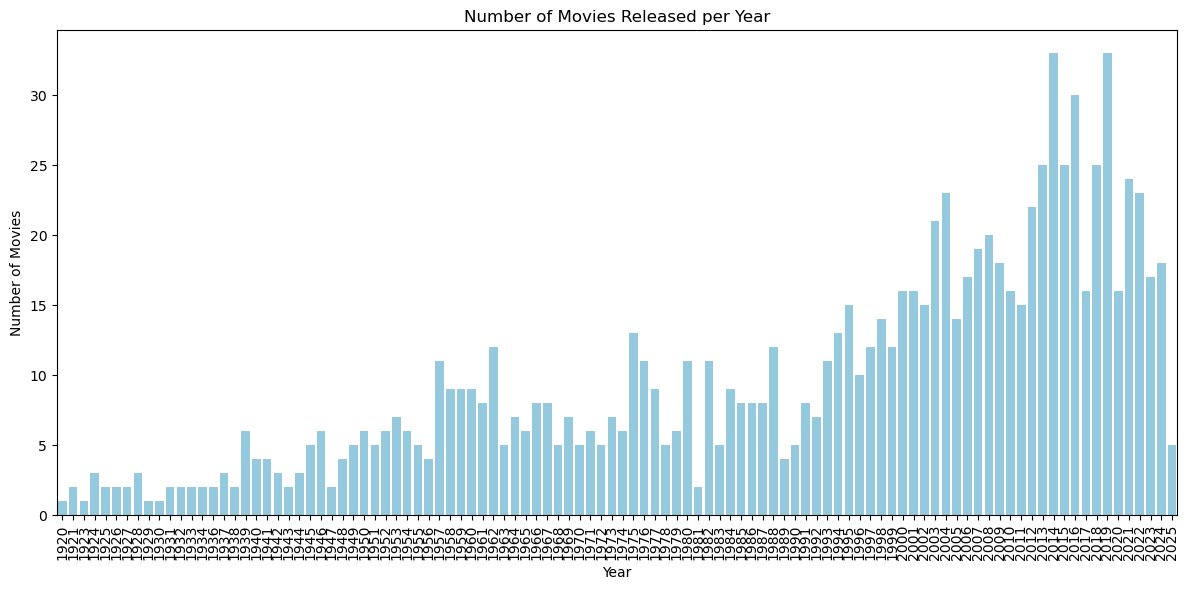

In [33]:
# ✅ Step 6: Movies Released per Year (Clean Version)
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, color='skyblue')  # Single color, no warning
plt.xticks(rotation=90)
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


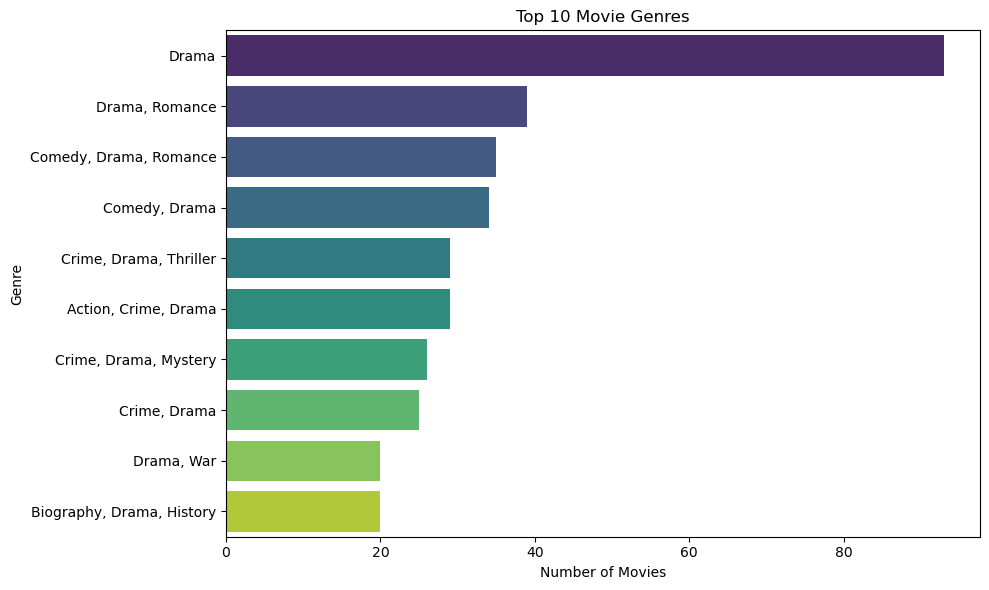

In [37]:
# ✅ Step 7: Top 10 Genres (Corrected for FutureWarning)
top_genres = df['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='viridis', legend=False)
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


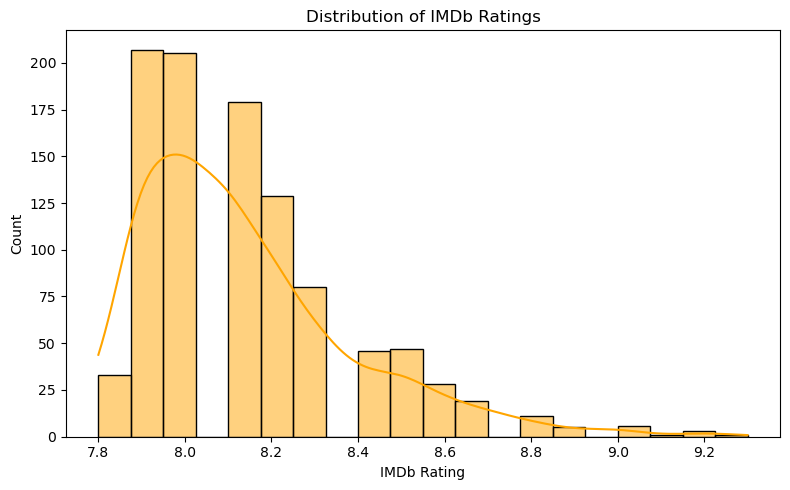

In [39]:
# ✅ Step 8: IMDb Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='orange')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [43]:
top_movies = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
top_movies[['Title', 'IMDB_Rating']]

,Title,IMDB_Rating
0,The Shawshank Redemption,9.3
2,The Chaos Class,9.2
3,Attack on Titan the Movie: The Last Attack,9.2
1,The Godfather,9.2
4,Ramayana: The Legend of Prince Rama,9.1
8,The Godfather Part II,9.0
9,12 Angry Men,9.0
10,The Silence of Swastika,9.0
7,Schindler's List,9.0
6,The Lord of the Rings: The Return of the King,9.0


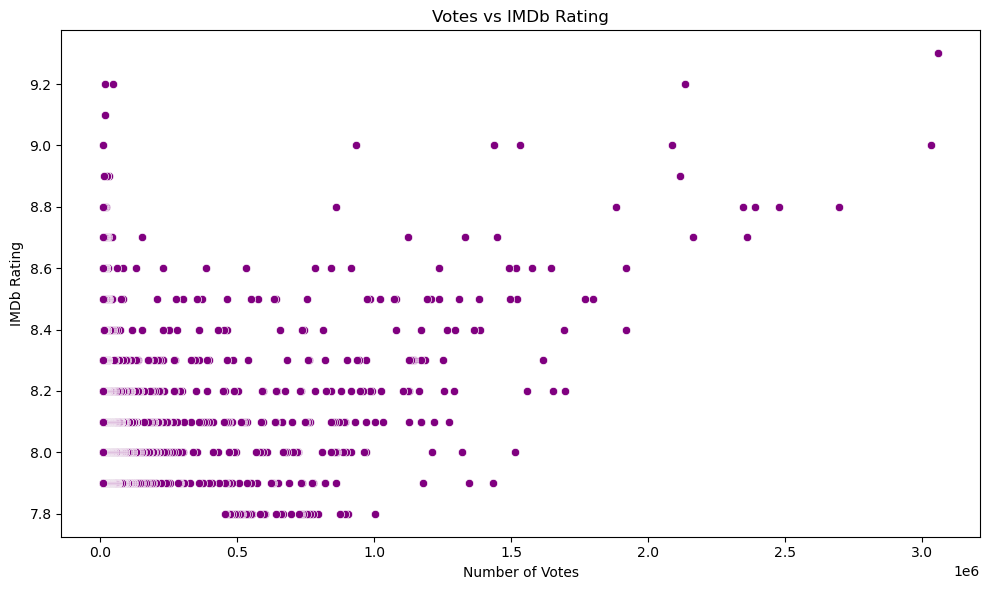

In [51]:
# ✅ Step 11: Votes vs IMDb Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df, color='purple')
plt.title("Votes vs IMDb Rating")
plt.xlabel("Number of Votes")
plt.ylabel("IMDb Rating")
plt.tight_layout()
plt.show()

In [31]:
# ✅ Step 13: Export Cleaned Data (Optional)
df.to_csv("cleaned_imdb_movies.csv", index=False)

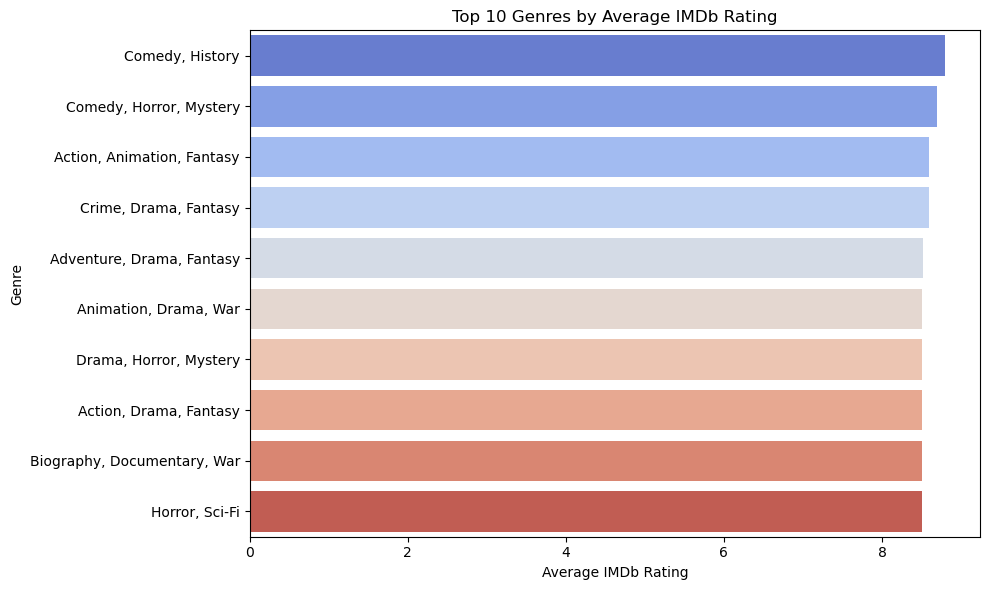

In [33]:
# ✅ Average IMDb Rating by Genre — FutureWarning fixed
avg_rating_by_genre = df.groupby('genres')['averageRating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_rating_by_genre.values,
    y=avg_rating_by_genre.index,
    hue=avg_rating_by_genre.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Top 10 Genres by Average IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


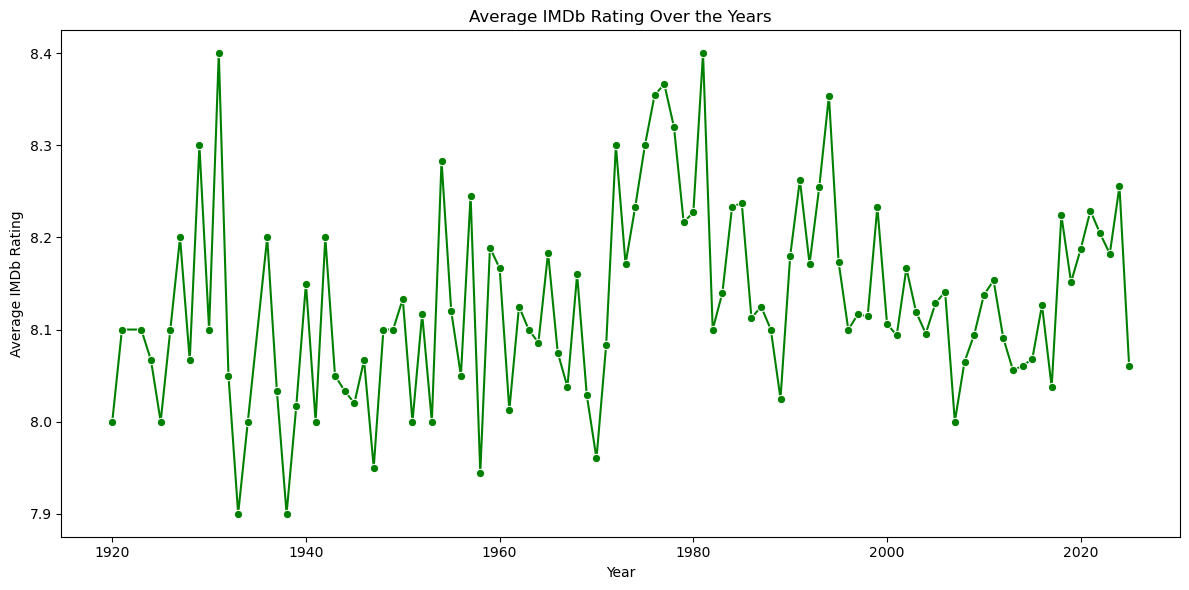

In [21]:
# ✅ IMDb Rating Trend Over Years
avg_rating_per_year = df.groupby('releaseYear')['averageRating'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, marker='o', color='green')
plt.title("Average IMDb Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average IMDb Rating")
plt.tight_layout()
plt.show()

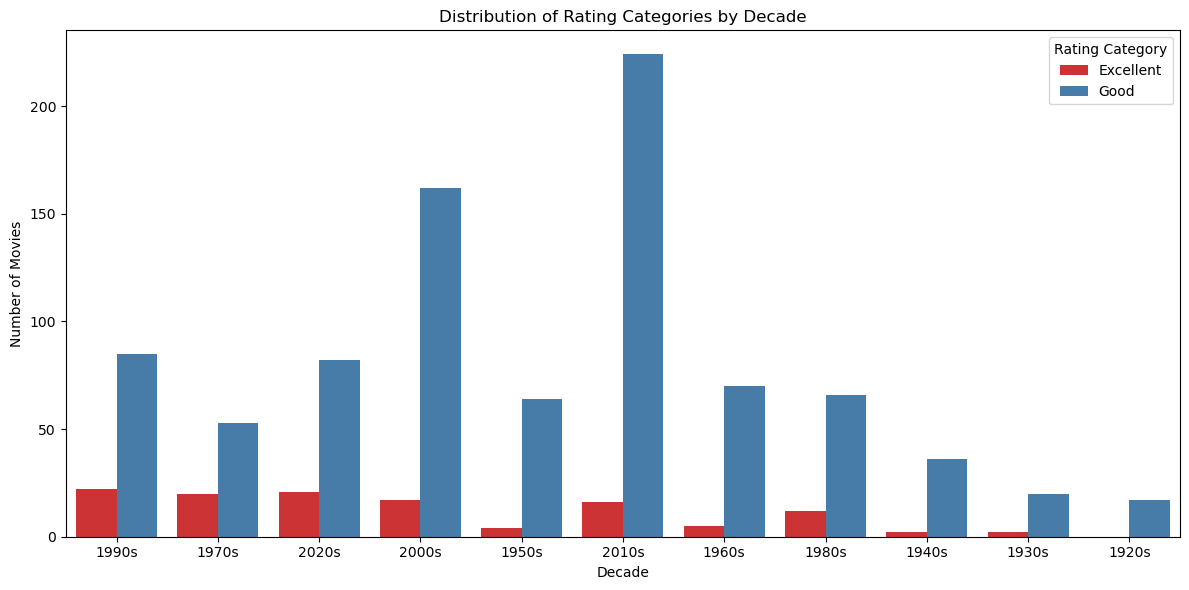

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the enhanced dataset
df = pd.read_csv("IMDb_Top_1000_Enhanced.csv")

# Plot: Distribution of Rating Categories by Decade
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Decade', hue='Rating_Category', palette='Set1')
plt.title("Distribution of Rating Categories by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.legend(title="Rating Category")
plt.tight_layout()
plt.show()
